# 1 Import Data

In [1]:
import pandas as pd
import os

In [2]:
# Set the path to the main project folder
path = r'C:\Users\luis\Desktop\Carrer Foundry boot camp\Machine Learning Specialization\Data Sets'

In [3]:
# Import the orders data
df = pd.read_csv(os.path.join(path, '80s_Weather_scaled.csv'))

In [4]:
df.head()

,DATE,MONTH,BASEL_temp_mean,BELGRADE_temp_mean,BUDAPEST_temp_mean,DEBILT_temp_mean,DUSSELDORF_temp_mean,GDANSK_temp_mean,HEATHROW_temp_mean,KASSEL_temp_mean,LJUBLJANA_temp_mean,MAASTRICHT_temp_mean,MADRID_temp_mean,MUNCHENB_temp_mean,OSLO_temp_mean,ROMA_temp_mean,SONNBLICK_temp_mean,STOCKHOLM_temp_mean,TOURS_temp_mean,VALENTIA_temp_mean
0,19800101,1,-1.444209,-1.428479,-1.269419,-1.356022,-1.432024,-1.108021,-2.171863,-1.373112,-1.390799,-1.450023,-0.311157,-1.319862,-1.116626,-1.552995,-2.070328,-0.898228,-1.249587,-1.641922
1,19800102,1,-1.566772,-1.554529,-1.281054,-1.558895,-1.446441,-1.082513,-2.171863,-1.306064,-1.486870,-1.464922,-0.872664,-1.444156,-1.411235,-1.671414,-2.432437,-1.282795,-1.527087,-1.110077
2,19800103,1,-1.416973,-1.646201,-1.571908,-1.855402,-1.532946,-1.159035,-1.408716,-1.802219,-1.558924,-1.479821,-1.269828,-1.556020,-2.035805,-1.952658,-2.635218,-1.487096,-1.650420,-0.365493
3,19800104,1,-1.457827,-2.035811,-1.874396,-1.246783,-1.244597,-1.363093,-0.957766,-1.359702,-1.931200,-1.122243,-1.269828,-1.630596,-2.471826,-2.322715,-1.939969,-1.547184,-0.941254,-0.764377
4,19800105,1,-0.926723,-1.829547,-2.130347,-0.887854,-0.812074,-1.605411,-1.027143,-0.984234,-1.174638,-0.839161,-1.256133,-0.698395,-1.529078,-1.760227,-0.737767,-0.946299,-0.725422,-0.790969


# 2 PCA

In [5]:
from sklearn.decomposition import PCA
import numpy as np

In [6]:
pca = PCA()
pca.fit(df)
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Display explained variance by each component
print(explained_variance)

# Display cumulative variance to determine optimal dimensions
print(cumulative_variance)

[9.99999964e-01 2.16039404e-08 1.17658088e-08 7.30717018e-10
 5.25719076e-10 4.67785045e-10 2.37695407e-10 2.13849251e-10
 1.16946730e-10 1.07517749e-10 9.05640964e-11 7.92068567e-11
 6.14349493e-11 4.70462676e-11 4.31640848e-11 3.14612779e-11
 2.46644512e-11 2.39060892e-11 1.61073532e-11 7.93513438e-12]
[0.99999996 0.99999999 1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.        ]


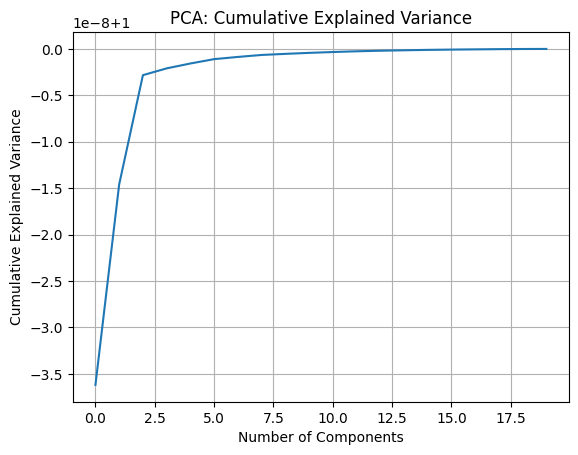

In [7]:
import matplotlib.pyplot as plt

# Plot the explained variance
plt.plot(cumulative_variance)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA: Cumulative Explained Variance')
plt.grid(True)
plt.show()

In [8]:
pca = PCA(n_components=10)  # Example: reduce to 10 components
reduced_data = pca.fit_transform(df)

In [9]:
reduced_data

array([[-4.55628563e+04,  7.62560455e+00, -1.76136075e+00, ...,
        -1.13804028e+00, -5.25358465e-01,  7.13912945e-02],
       [-4.55618563e+04,  8.04474435e+00, -1.49970784e+00, ...,
        -5.69554236e-01, -4.81740535e-01,  2.35977561e-03],
       [-4.55608563e+04,  8.39085657e+00, -1.26129942e+00, ...,
         1.34739206e-01, -4.14918023e-01,  1.74302443e-01],
       ...,
       [ 4.55651437e+04,  1.91487734e+00,  7.56146801e+00, ...,
         5.94479777e-01, -4.56763935e-01, -5.61150770e-02],
       [ 4.55661437e+04,  1.81423859e+00,  7.51199340e+00, ...,
         6.87538306e-01, -5.26605768e-01, -8.30262891e-02],
       [ 4.55671437e+04,  1.96072915e+00,  7.59908279e+00, ...,
         7.66973898e-01, -4.92402314e-01, -3.83737284e-02]])

In [11]:
# Convert the NumPy array to a pandas DataFrame
reduced_data = pd.DataFrame(reduced_data)

# Define the custom directory path where you want to export the file
output_path = os.path.join(path, 'reduced_data.csv')

# Export the scaled dataframe to the specified CSV file
reduced_data.to_csv(output_path, index=False)